## BIOINFORMATICS THESIS: MULTIMODAL NEURAL NETWORK

# CELL LINE: A549

da fare 
- sistema selezione augmentation in embracenet
- crea grafici AUPRC reti

In [1]:
import pandas as pd 
import numpy as np
import os

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, OrderedDict
import pickle

import sqlite3
from sqlalchemy import create_engine

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# create a database to store optuna studies with sqlite backend
#engine = create_engine('sqlite:///BIOINF_optuna_tuning.db')

In [3]:
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

In [4]:
cell_line = CELL_LINES[0]
cell_line

'A549'

---

In [5]:
from BIOINF_tesi.data_pipe import Load_Create_Task
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline

In [6]:
from BIOINF_tesi.models import FFNN, CNN, CNN_LSTM
from BIOINF_tesi.models.utils import fit, Param_Search, Kfold_CV

In [7]:
with open ('results_dict.pickle', 'rb') as fin:
    results_dict = pickle.load(fin)
    results_dict = defaultdict(lambda: defaultdict(dict), results_dict)

## 1) ACTIVE ENHANCERS vs INACTIVE ENHANCERS

In [8]:
task = TASKS[0]
task

'active_E_vs_inactive_E'

In [9]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


### 1. FFNN

In [11]:
model=FFNN

In [12]:
# IMBALANCED
type_augm_genfeatures = 'smote'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-23 11:40:01,705] A new study created in RDB with name: A549_active_E_vs_inactive_E_FFNN_smote_1


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
[I 2021-10-23 11:44:58,805] Trial 0 finished with value: 0.10306413047001788 and parameters: {'n_layers': 1, 'n_units_l0': 128, 'dropout_l0': 0.3, 'optimizer': 'RMSprop', 'lr': 2.664542708182563e-05, 'weight_decay': 0.004921740884108041}. Best is trial 0 with value: 0.10306413047001788.


EarlyStopping counter: 5 out of 5
Early stopping the training


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.8/site-packages/timm/optim/nadam.py:69: UserWarning: This overload of add is deprecated:
	add(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1025.)
  grad = grad.add(group['weight_decay'], p.data)


EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-23 11:46:29,666] Trial 1 finished with value: 0.053767605633802805 and parameters: {'n_layers': 3, 'n_units_l0': 256, 'dropout_l0': 0.0, 'n_units_l1': 64, 'dropout_l1': 0.0, 'n_units_l2': 4, 'dropout_l2': 0.4, 'optimizer': 'Nadam', 'lr': 0.00040708127680073473, 'weight_decay': 0.008606559277120274}. Best is trial 0 with value: 0.10306413047001788.


EarlyStopping counter: 5 out of 5
Early stopping the training


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-23 11:48:11,745] Trial 2 finished with value: 0.1104619151157415 and parameters: {'n_layers': 2, 'n_units_l0': 256, 'dropout_l0': 0.2, 'n_units_l1': 128, 'dropout_l1': 0.4, 'optimizer': 'RMSprop', 'lr': 0.001097056625573127, 'weight_decay': 0.00011650436869019969}. Best is trial 2 with value: 0.1104619151157415.


EarlyStopping counter: 5 out of 5
Early stopping the training
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1104619151157415
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    lr: 0.001097056625573127
    n_layers: 2
    n_units_l0: 256
    n_units_l1: 128
    optimizer: RMSprop
    weight_decay: 0.00011650436869019969

===============> MODEL TESTING


/opt/anaconda3/lib/python3.8/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-23 11:52:06,889] A new study created in RDB with name: A549_active_E_vs_inactive_E_FFNN_smote_1_2


EarlyStopping counter: 5 out of 5
Early stopping the training
AUPRC test score: 0.12271190879786972


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-23 11:53:46,759] Trial 0 finished with value: 0.05771126760563378 and parameters: {'n_layers': 3, 'n_units_l0': 64, 'dropout_l0': 0.0, 'n_units_l1': 16, 'dropout_l1': 0.4, 'n_units_l2': 4, 'dropout_l2': 0.4, 'optimizer': 'Adam', 'lr': 0.011524236736432346, 'weight_decay': 0.005840869333609987}. Best is trial 0 with value: 0.05771126760563378.


EarlyStopping counter: 5 out of 5
Early stopping the training


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-23 11:55:12,723] Trial 1 finished with value: 0.12463288994383959 and parameters: {'n_layers': 1, 'n_units_l0': 128, 'dropout_l0': 0.2, 'optimizer': 'Nadam', 'lr': 0.029927035852373256, 'weight_decay': 0.0009033349332847114}. Best is trial 1 with value: 0.12463288994383959.


EarlyStopping counter: 5 out of 5
Early stopping the training


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-23 11:58:10,284] Trial 2 finished with value: 0.11784912258799218 and parameters: {'n_layers': 3, 'n_units_l0': 256, 'dropout_l0': 0.4, 'n_units_l1': 16, 'dropout_l1': 0.0, 'n_units_l2': 16, 'dropout_l2': 0.0, 'optimizer': 'RMSprop', 'lr': 0.00010872832957219514, 'weight_decay': 0.0015213018894917076}. Best is trial 1 with value: 0.12463288994383959.


EarlyStopping counter: 5 out of 5
Early stopping the training
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.12463288994383959
  Params: 
    dropout_l0: 0.2
    lr: 0.029927035852373256
    n_layers: 1
    n_units_l0: 128
    optimizer: Nadam
    weight_decay: 0.0009033349332847114

===============> MODEL TESTING


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping the training
AUPRC test score: 0.12639365042112455


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-23 12:02:09,123] A new study created in RDB with name: A549_active_E_vs_inactive_E_FFNN_smote_1_2_3


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-23 12:04:01,157] Trial 0 finished with value: 0.13300132202619236 and parameters: {'n_layers': 2, 'n_units_l0': 32, 'dropout_l0': 0.4, 'n_units_l1': 16, 'dropout_l1': 0.2, 'optimizer': 'Adam', 'lr': 0.01807055123024261, 'weight_decay': 0.009312825613933257}. Best is trial 0 with value: 0.13300132202619236.


EarlyStopping counter: 5 out of 5
Early stopping the training


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-23 12:05:44,776] Trial 1 finished with value: 0.12101517346291352 and parameters: {'n_layers': 1, 'n_units_l0': 32, 'dropout_l0': 0.2, 'optimizer': 'Nadam', 'lr': 0.007331000935518374, 'weight_decay': 0.0020788261471658184}. Best is trial 0 with value: 0.13300132202619236.


EarlyStopping counter: 5 out of 5
Early stopping the training


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-23 12:11:43,679] Trial 2 finished with value: 0.12980935199215582 and parameters: {'n_layers': 2, 'n_units_l0': 256, 'dropout_l0': 0.2, 'n_units_l1': 16, 'dropout_l1': 0.0, 'optimizer': 'RMSprop', 'lr': 0.00011420899902653599, 'weight_decay': 0.003187037582550304}. Best is trial 0 with value: 0.13300132202619236.


EarlyStopping counter: 5 out of 5
Early stopping the training
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.13300132202619236
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.2
    lr: 0.01807055123024261
    n_layers: 2
    n_units_l0: 32
    n_units_l1: 16
    optimizer: Adam
    weight_decay: 0.009312825613933257

===============> MODEL TESTING


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping the training
AUPRC test score: 0.13466746340353447



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.12792


In [12]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [13]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

In [ ]:
# IMBALANCED
type_augm_genfeatures = 'double'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST.pt')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-23 12:25:59,184] A new study created in RDB with name: A549_active_E_vs_inactive_E_FFNN_double_1


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

In [15]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [16]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [14]:
model=CNN

In [ ]:
# IMBALANCED
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [16]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [17]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 2) ACTIVE PROMOTERS vs INACTIVE PROMOTERS

In [ ]:
task = TASKS[1]
task

In [ ]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

---

### 1. FFNN

In [ ]:
model=FFNN

In [ ]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [21]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [22]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [20]:
model=CNN

In [ ]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [22]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [23]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 3) ACTIVE ENHANCERS vs ACTIVE PROMOTERS

In [ ]:
task = TASKS[2]
task

In [ ]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

---
### 1. FFNN

In [ ]:
model=FFNN

In [ ]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [27]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [28]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [26]:
model=CNN

In [ ]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [28]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [29]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 4) INACTIVE ENHANCERS vs INACTIVE PROMOTERS

In [ ]:
task = TASKS[3]
task

In [ ]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

---
### 1. FFNN

In [ ]:
model=FFNN

In [ ]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [33]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [34]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [32]:
model=CNN

In [ ]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [34]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [35]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 5) ACTIVE ENHANCERS + ACTIVE PROMOTERS vs INACTIVE REST

In [ ]:
task = TASKS[4]
task

In [ ]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

---
### 1. FFNN

In [ ]:
model=FFNN

In [ ]:
# IMBALANCED
type_augm_genfeatures = 'smote'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST')

In [12]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [13]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

In [ ]:
# IMBALANCED
type_augm_genfeatures = 'double'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST')

In [15]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [16]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [38]:
model=CNN

In [ ]:
# IMBALANCED
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [41]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [42]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

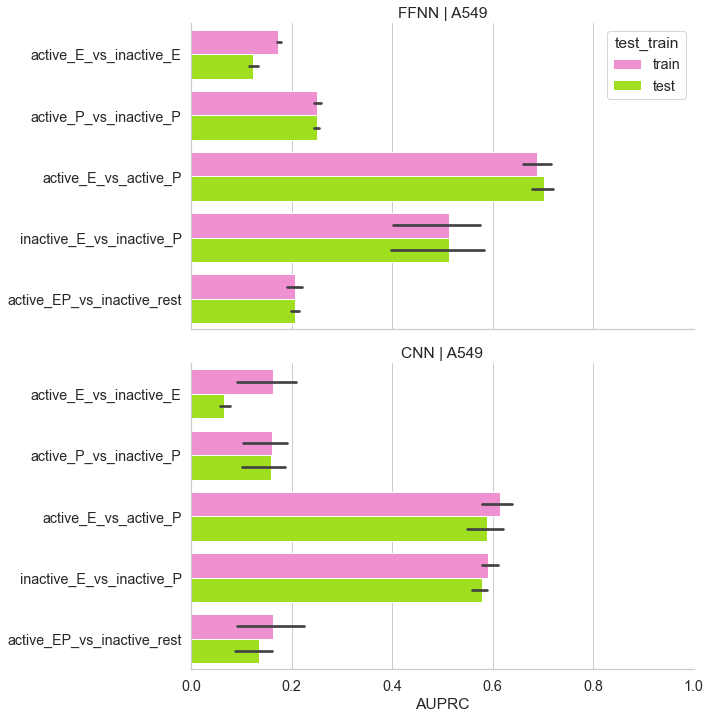

In [12]:
plot_scores(cells=cell_line, models=['FFNN','CNN'])